In [470]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from numpy import linalg as LA

import seaborn as sns
import quandl
import scipy.optimize as sco
import math

In [471]:
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [472]:
from keras.layers import LeakyReLU

In [473]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.models import load_model
from sklearn.preprocessing import StandardScaler  
from collections import defaultdict
from collections import Iterable

In [474]:
# Load data

# stock componenet data
stock = defaultdict(defaultdict)

In [475]:
n_train=134

stock_percentage = pd.read_csv('LP.csv', index_col=0).dropna(axis=1, how = 'any').astype('float32')
stock['autoencoder']['return']=stock_percentage.iloc[:, :]
stock['calibrate']['return'] = stock_percentage.iloc[0:134, :]
stock['validate']['return'] = stock_percentage.iloc[134:, :]


# BSE data
BSE = defaultdict(defaultdict)
BSE_full = pd.read_csv('BSE.csv', index_col=0).astype('float32')

BSE_lp = BSE_full.iloc[:,0] # Series
BSE['calibrate']['lp'] = BSE_lp[0:134]
BSE['validate']['lp'] = BSE_lp[134:]

BSE_net = BSE_full.iloc[:,1] # Series
BSE['calibrate']['net'] = BSE_net[0:134]
BSE['validate']['net'] = BSE_net[134:]

BSE_percentage = BSE_full.iloc[:,2] # Series
BSE['calibrate']['return'] = BSE_percentage[0:134]
BSE['validate']['return'] = BSE_percentage[134:]

In [476]:
encoding_dim = 7 # 7 neurons
num_stock = len(stock_percentage.columns) # Use NUMBER OF STOCKS LEFT AFTER REMOVING SOME INEFFECTIVE STOCKS HAVING NAs
# connect all layers
input_stocks = Input(shape=(num_stock, ))
input_stocks


<tf.Tensor 'input_16:0' shape=(?, 48) dtype=float32>

In [477]:
encoded = Dense(encoding_dim, kernel_regularizer=regularizers.l2(0.0008))(input_stocks)
encoded= LeakyReLU(alpha=0.03)(encoded)
decoded = Dense(num_stock, activation= 'linear', kernel_regularizer=regularizers.l2(0.0001))(encoded) # see 'Stacked Auto-Encoders' in paper



In [478]:
# construct and compile AE model
autoencoder = Model(input_stocks, decoded)
autoencoder.compile(optimizer='sgd', loss='mean_squared_error')

# train autoencoder
data_auto = stock['calibrate']['return']

autoencoder.fit(data_auto, data_auto, shuffle=False, epochs=300, batch_size = 30)
autoencoder.save('retrack_autoencoder.h5')

# test/reconstruct market information matrix
reconstruct = autoencoder.predict(data_auto)

Epoch 1/300
134/134 [==============================] - 0s 3ms/step - loss: 46.6861
Epoch 2/300
134/134 [==============================] - 0s 89us/step - loss: 41.1156
Epoch 3/300
134/134 [==============================] - 0s 112us/step - loss: 38.8964
Epoch 4/300
134/134 [==============================] - 0s 74us/step - loss: 37.3182
Epoch 5/300
134/134 [==============================] - 0s 60us/step - loss: 35.7775
Epoch 6/300
134/134 [==============================] - 0s 67us/step - loss: 34.3640
Epoch 7/300
134/134 [==============================] - 0s 66us/step - loss: 33.1098
Epoch 8/300
134/134 [==============================] - 0s 97us/step - loss: 32.0531
Epoch 9/300
134/134 [==============================] - 0s 67us/step - loss: 31.2134
Epoch 10/300
134/134 [==============================] - 0s 60us/step - loss: 30.5563
Epoch 11/300
134/134 [==============================] - 0s 97us/step - loss: 30.0145
Epoch 12/300
134/134 [==============================] - 0s 74us/step - los

134/134 [==============================] - 0s 97us/step - loss: 21.4545
Epoch 97/300
134/134 [==============================] - 0s 74us/step - loss: 21.4409
Epoch 98/300
134/134 [==============================] - 0s 89us/step - loss: 21.4278
Epoch 99/300
134/134 [==============================] - 0s 82us/step - loss: 21.4150
Epoch 100/300
134/134 [==============================] - 0s 97us/step - loss: 21.4025
Epoch 101/300
134/134 [==============================] - 0s 104us/step - loss: 21.3905
Epoch 102/300
134/134 [==============================] - 0s 89us/step - loss: 21.3787
Epoch 103/300
134/134 [==============================] - 0s 97us/step - loss: 21.3640
Epoch 104/300
134/134 [==============================] - 0s 104us/step - loss: 21.3504
Epoch 105/300
134/134 [==============================] - 0s 89us/step - loss: 21.3371
Epoch 106/300
134/134 [==============================] - 0s 82us/step - loss: 21.3242
Epoch 107/300
134/134 [==============================] - 0s 67us/step

134/134 [==============================] - 0s 74us/step - loss: 20.8039
Epoch 192/300
134/134 [==============================] - 0s 89us/step - loss: 20.8007
Epoch 193/300
134/134 [==============================] - 0s 67us/step - loss: 20.7974
Epoch 194/300
134/134 [==============================] - 0s 82us/step - loss: 20.7947
Epoch 195/300
134/134 [==============================] - 0s 67us/step - loss: 20.7914
Epoch 196/300
134/134 [==============================] - 0s 82us/step - loss: 20.7883
Epoch 197/300
134/134 [==============================] - 0s 89us/step - loss: 20.7854
Epoch 198/300
134/134 [==============================] - 0s 74us/step - loss: 20.7829
Epoch 199/300
134/134 [==============================] - 0s 89us/step - loss: 20.7798
Epoch 200/300
134/134 [==============================] - 0s 82us/step - loss: 20.7768
Epoch 201/300
134/134 [==============================] - 0s 74us/step - loss: 20.7739
Epoch 202/300
134/134 [==============================] - 0s 89us/ste

134/134 [==============================] - 0s 104us/step - loss: 20.6010
Epoch 287/300
134/134 [==============================] - 0s 97us/step - loss: 20.5995
Epoch 288/300
134/134 [==============================] - 0s 82us/step - loss: 20.5979
Epoch 289/300
134/134 [==============================] - 0s 74us/step - loss: 20.5964
Epoch 290/300
134/134 [==============================] - 0s 67us/step - loss: 20.5950
Epoch 291/300
134/134 [==============================] - 0s 74us/step - loss: 20.5934
Epoch 292/300
134/134 [==============================] - 0s 82us/step - loss: 20.5916
Epoch 293/300
134/134 [==============================] - 0s 89us/step - loss: 20.5898
Epoch 294/300
134/134 [==============================] - 0s 74us/step - loss: 20.5881
Epoch 295/300
134/134 [==============================] - 0s 97us/step - loss: 20.5865
Epoch 296/300
134/134 [==============================] - 0s 97us/step - loss: 20.5848
Epoch 297/300
134/134 [==============================] - 0s 82us/st

In [479]:
communal_information = []
for i in range(0,num_stock):
    diff = np.linalg.norm((data_auto.iloc[:,i] - reconstruct[:,i]))
    communal_information.append(float(diff))

In [480]:
print("stock #, 2-norm, stock name")
ranking = np.array(communal_information).argsort()
for stock_index in ranking:
    print(stock_index, communal_information[stock_index], stock['autoencoder']['return'].iloc[:,stock_index].name)

stock #, 2-norm, stock name
1 27.618568420410156 ABBOT
36 28.664796829223633 P&g
13 32.07072448730469 REDDY
25 32.18174362182617 LUPIN
11 32.59071350097656 CIPLA
38 33.90653610229492 SANOFI
16 34.14296340942383 GLAXO
12 34.843963623046875 DIVIS
31 34.9419059753418 NOVARTIS
15 35.572357177734375 FORTIS
8 36.073951721191406 BIOCON
10 37.39101791381836 CADILA
14 38.12732696533203 FDC
17 39.550498962402344 GLEN
33 39.66071701049805 PANACEA
21 39.9475212097168 IPCA
35 41.73438262939453 PIRAMAL
22 43.563602447509766 JB
5 44.25358200073242 APOLLO
3 45.32826614379883 ALBERT
44 46.515296936035156 UNICHEM
34 46.627742767333984 PFIZER
19 48.270179748535156 HIKAL
39 48.38008117675781 SHILPA
30 51.8014030456543 NEULAND
26 52.898338317871094 MARKSANS
9 53.064945220947266 BLISS
32 54.14787292480469 OPTO
43 54.483455657958984 TORRENT
46 56.88857650756836 VIVIMID
28 56.931697845458984 NATCO
42 57.98389434814453 SUNADV
0 58.056785583496094 AARTI
41 58.158756256103516 SUN
20 58.18231964111328 INDOCO
7 59

In [497]:
data = stock['calibrate']['return']
data=data/100
data= data+1
data=np.log(data)
ranking

array([ 1, 36, 13, 25, 11, 38, 16, 12, 31, 15,  8, 10, 14, 17, 33, 21, 35,
       22,  5,  3, 44, 34, 19, 39, 30, 26,  9, 32, 43, 46, 28, 42,  0, 41,
       20,  7, 27, 40,  6, 18, 29, 47, 24,  4, 37, 23, 45,  2],
      dtype=int64)

In [498]:
rank= ranking.copy() 
rank= rank[10:num_stock]
for i in rank:
    data.drop([data.iloc[:,i].name], axis=1, inplace=True)
    for k in range(len(rank)):
        if(rank[k]>i-1):
            rank[k]=rank[k]-1
            

Text(0, 0.5, 'Return')

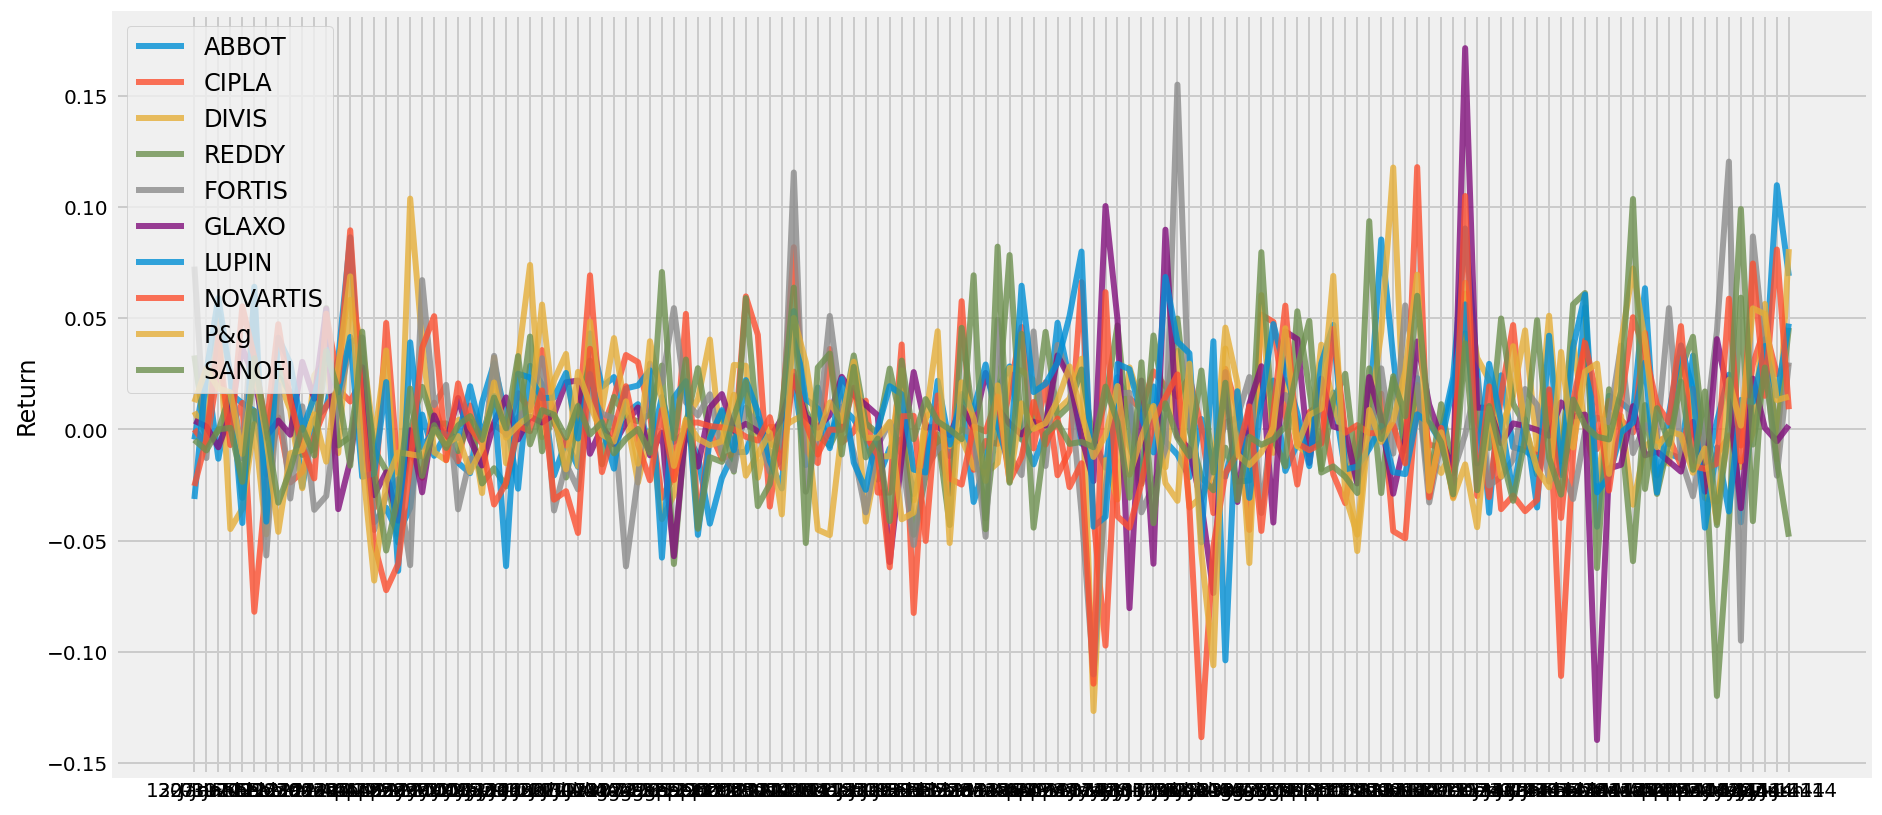

In [499]:
plt.figure(figsize=(14, 7))
for c in data.columns.values:
    plt.plot(data.index, data[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Return')

In [500]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *52
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(52)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(data.columns))
        weights = weights/(np.sum(weights))
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [501]:

mean_returns = data.mean()
cov_matrix = data.cov()
num_portfolios = 100000
risk_free_rate = 0.075

In [502]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-------------------------")
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Return:"), round(rp,2)
    print (" Volatility:"), round(sdp,2)
    print ("\n")
    print (max_sharpe_allocation)
    print ("-------------------------")
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:"), round(rp_min,2)
    print ("Annualised Volatility:"), round(sdp_min,2)
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel(' volatility')
    plt.ylabel(' returns')
    plt.legend(labelspacing=0.8)

-------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return:
 Volatility:


            ABBOT  CIPLA  DIVIS  REDDY  FORTIS  GLAXO  LUPIN  NOVARTIS   P&g  \
allocation   6.93   0.57    8.9  22.21    3.44   4.21  39.91      5.44  3.57   

            SANOFI  
allocation    4.84  
-------------------------
Minimum Volatility Portfolio Allocation

Annualised Return:
Annualised Volatility:


            ABBOT  CIPLA  DIVIS  REDDY  FORTIS  GLAXO  LUPIN  NOVARTIS    P&g  \
allocation  21.66   6.53   6.48   8.17    7.82  11.38   7.28      0.54  10.45   

            SANOFI  
allocation   19.68  


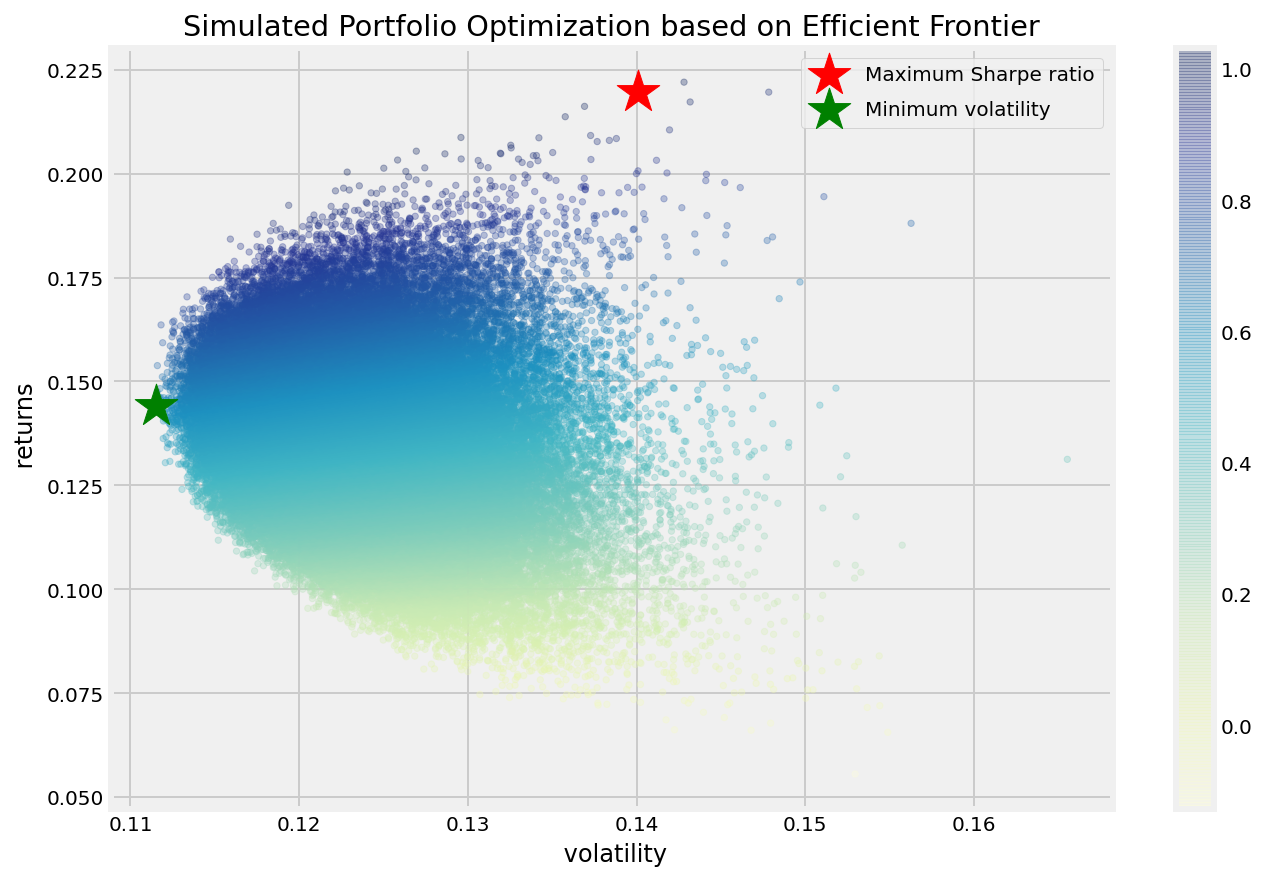

In [503]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [504]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [505]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [506]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [507]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-------------------------")
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Return:"), round(rp,2)
    print (" Volatility:"), round(sdp,2)
    print ("\n")
    print (max_sharpe_allocation)
    print ("-------------------------")
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:"), round(rp_min,2)
    print ("Annualised Volatility:"), round(sdp_min,2)
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

-------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return:
 Volatility:


            ABBOT  CIPLA  DIVIS  REDDY  FORTIS  GLAXO  LUPIN  NOVARTIS  P&g  \
allocation    3.1    0.0   17.1   2.48     0.0    0.0  63.41       0.0  0.0   

            SANOFI  
allocation   13.92  
-------------------------
Minimum Volatility Portfolio Allocation

Annualised Return:
Annualised Volatility:


            ABBOT  CIPLA  DIVIS  REDDY  FORTIS  GLAXO  LUPIN  NOVARTIS    P&g  \
allocation  14.38   6.85   7.45    8.6    8.34  11.53  10.14       0.0  12.42   

            SANOFI  
allocation    20.3  


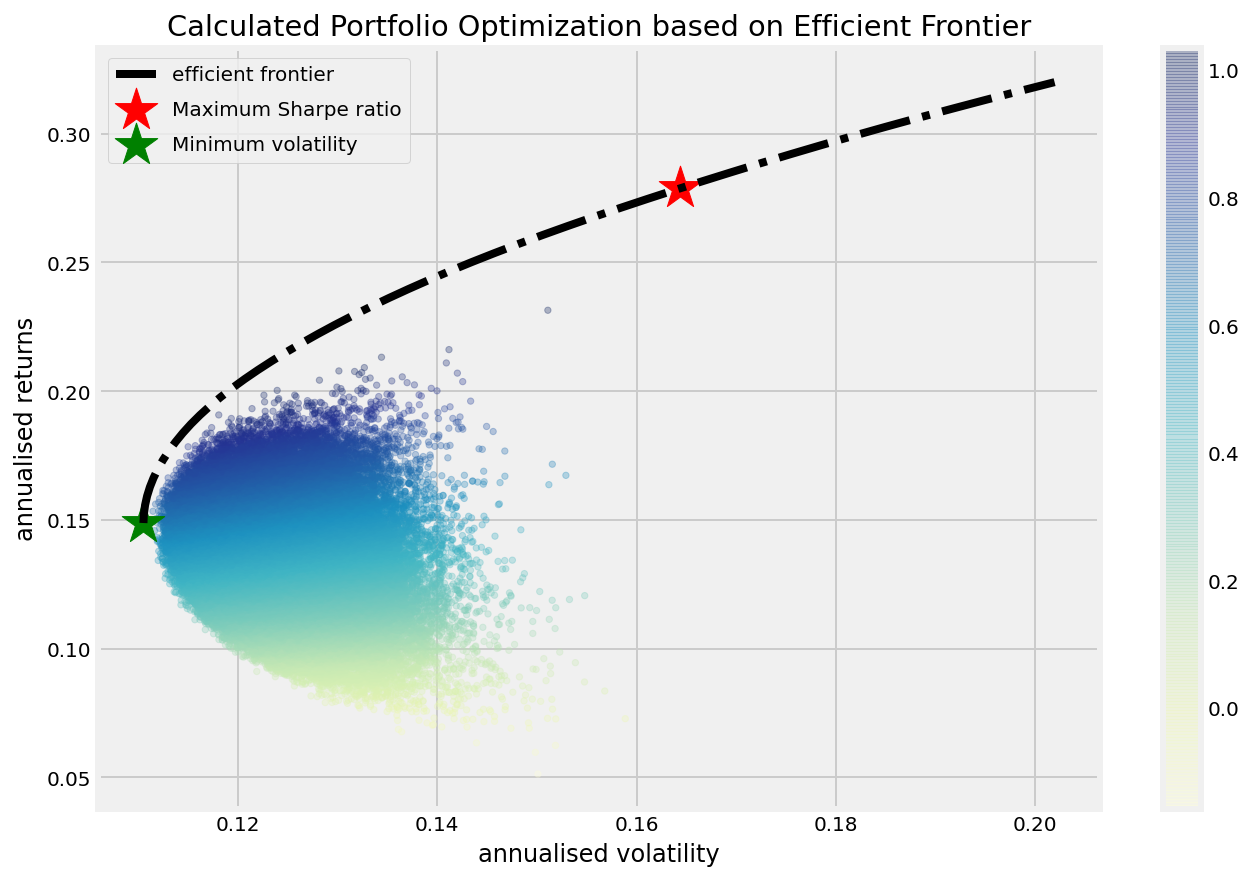

In [508]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [521]:
#Autoencoded Plot
which_stock = 13




stock_autoencoder = []
stock_actual =[]


return_autoencoded = copy.deepcopy(reconstruct[0:134, which_stock])
return_actual= copy.deepcopy(data_auto.iloc[0:134,which_stock])


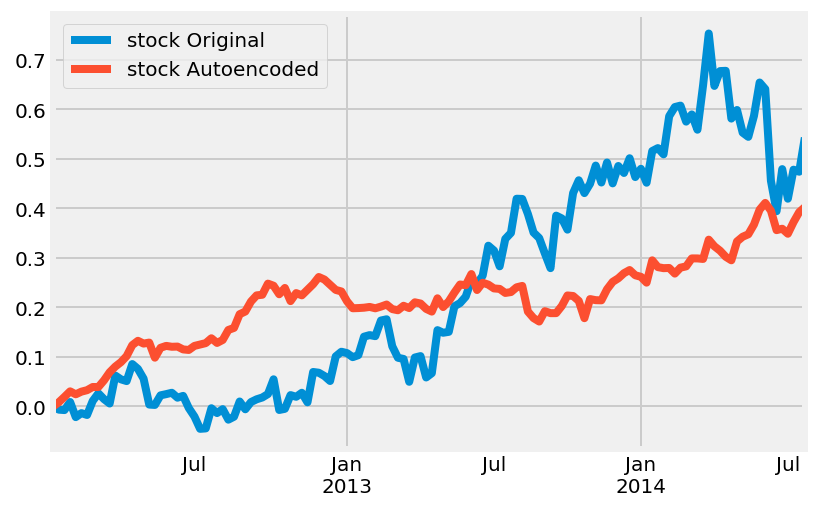

In [522]:
return_autoencoded[0] = 0
return_actual[0]= 0
for i in range(1,n_train):
    return_autoencoded[i]=(1+(return_autoencoded[i]/100))*(return_autoencoded[i-1]+1)-1
    return_actual[i]=(1+(return_actual[i]/100))*(return_actual[i-1]+1)-1
stock_actual = return_actual.tolist()
## plot for comparison
pd.Series(stock_actual, index=pd.date_range(start='01/06/2012', periods=134, freq='W')).plot(label='stock Original', legend=True)
pd.Series(return_autoencoded, index=pd.date_range(start='01/06/2012', periods = 134,freq='W')).plot(label='stock Autoencoded', legend=True)

In [535]:
bse_predict = defaultdict(defaultdict)
total_2_norm_diff = defaultdict(defaultdict)

dl_scaler = defaultdict(StandardScaler)
port =np.array([15,20,25,30,35])

for non_communal in port:  
    # some numerical values
    encoding_dim = 10
    s = 10 + non_communal
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:])) # portfolio index
    
    
    # connect all layers
    stock_input = Input(shape=(s,))
    encoded = Dense(encoding_dim, kernel_regularizer=regularizers.l2(0.0008))(stock_input)
    encoded = LeakyReLU(alpha=0.3)(encoded)
    decoded = Dense(1, activation= 'linear', kernel_regularizer=regularizers.l2(0.0001))(encoded)
    
    
    # construct and compile deep learning routine
    deep_learner = Model(stock_input, decoded)
    deep_learner.compile(optimizer='sgd', loss='mean_squared_error')
    
    x = stock['calibrate']['return'].iloc[:, stock_index]
    y = BSE['calibrate']['return']
    
    dl_scaler[s] = StandardScaler()       # Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data
    dl_scaler[s].fit(x)
    x = dl_scaler[s].transform(x)  
    
    deep_learner.fit(x, y, shuffle=False, epochs=500, batch_size = 50)    # fit the model
    deep_learner.save('retrack_s' + str(s) + '.h5') # for validation phase use
    
    bse_autoencoded = copy.deepcopy(deep_learner.predict(x))
    bse_autoencoded[0] = 0
    bse_autoencoded = bse_autoencoded/100 + 1
    bse_actual = copy.deepcopy(BSE_percentage[0:134])
    bse_actual[0] = 0
    for i in range(1,n_train):
        bse_actual[i]=(1+(bse_actual[i]/100))*(bse_actual[i-1]+1)-1
    bse_actual = bse_actual.tolist()
    bse_predict['calibrate'][s] = (bse_actual[0]+1) * (bse_autoencoded.cumprod())-1          
    total_2_norm_diff['calibrate'][s] = np.linalg.norm((bse_predict['calibrate'][s] - bse_actual))

C:\Users\Ranju\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ranju\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.


Epoch 1/500
134/134 [==============================] - 1s 4ms/step - loss: 6.3247
Epoch 2/500
134/134 [==============================] - 0s 61us/step - loss: 3.7625
Epoch 3/500
134/134 [==============================] - 0s 64us/step - loss: 2.7740
Epoch 4/500
134/134 [==============================] - 0s 82us/step - loss: 2.2420
Epoch 5/500
134/134 [==============================] - 0s 61us/step - loss: 1.9041
Epoch 6/500
134/134 [==============================] - 0s 60us/step - loss: 1.6730
Epoch 7/500
134/134 [==============================] - 0s 52us/step - loss: 1.5038
Epoch 8/500
134/134 [==============================] - 0s 83us/step - loss: 1.3752
Epoch 9/500
134/134 [==============================] - 0s 53us/step - loss: 1.2728
Epoch 10/500
134/134 [==============================] - 0s 67us/step - loss: 1.1877
Epoch 11/500
134/134 [==============================] - 0s 57us/step - loss: 1.1158
Epoch 12/500
134/134 [==============================] - 0s 52us/step - loss: 1.0542
Ep

134/134 [==============================] - 0s 73us/step - loss: 0.4231
Epoch 99/500
134/134 [==============================] - 0s 74us/step - loss: 0.4220
Epoch 100/500
134/134 [==============================] - 0s 74us/step - loss: 0.4208
Epoch 101/500
134/134 [==============================] - 0s 83us/step - loss: 0.4197
Epoch 102/500
134/134 [==============================] - 0s 101us/step - loss: 0.4186
Epoch 103/500
134/134 [==============================] - 0s 74us/step - loss: 0.4174
Epoch 104/500
134/134 [==============================] - 0s 78us/step - loss: 0.4164
Epoch 105/500
134/134 [==============================] - 0s 64us/step - loss: 0.4152
Epoch 106/500
134/134 [==============================] - 0s 93us/step - loss: 0.4142
Epoch 107/500
134/134 [==============================] - 0s 112us/step - loss: 0.4132
Epoch 108/500
134/134 [==============================] - 0s 68us/step - loss: 0.4120
Epoch 109/500
134/134 [==============================] - 0s 67us/step - loss: 

134/134 [==============================] - 0s 70us/step - loss: 0.3328
Epoch 195/500
134/134 [==============================] - 0s 80us/step - loss: 0.3321
Epoch 196/500
134/134 [==============================] - 0s 114us/step - loss: 0.3311
Epoch 197/500
134/134 [==============================] - 0s 64us/step - loss: 0.3301
Epoch 198/500
134/134 [==============================] - 0s 67us/step - loss: 0.3293
Epoch 199/500
134/134 [==============================] - 0s 119us/step - loss: 0.3283
Epoch 200/500
134/134 [==============================] - 0s 177us/step - loss: 0.3274
Epoch 201/500
134/134 [==============================] - 0s 89us/step - loss: 0.3265
Epoch 202/500
134/134 [==============================] - 0s 61us/step - loss: 0.3255
Epoch 203/500
134/134 [==============================] - 0s 68us/step - loss: 0.3246
Epoch 204/500
134/134 [==============================] - 0s 76us/step - loss: 0.3237
Epoch 205/500
134/134 [==============================] - 0s 72us/step - loss

134/134 [==============================] - 0s 76us/step - loss: 0.2529
Epoch 290/500
134/134 [==============================] - 0s 55us/step - loss: 0.2520
Epoch 291/500
134/134 [==============================] - 0s 77us/step - loss: 0.2513
Epoch 292/500
134/134 [==============================] - 0s 93us/step - loss: 0.2506
Epoch 293/500
134/134 [==============================] - ETA: 0s - loss: 0.171 - 0s 71us/step - loss: 0.2499
Epoch 294/500
134/134 [==============================] - 0s 60us/step - loss: 0.2492
Epoch 295/500
134/134 [==============================] - 0s 71us/step - loss: 0.2488
Epoch 296/500
134/134 [==============================] - 0s 89us/step - loss: 0.2479
Epoch 297/500
134/134 [==============================] - 0s 60us/step - loss: 0.2472
Epoch 298/500
134/134 [==============================] - 0s 100us/step - loss: 0.2465
Epoch 299/500
134/134 [==============================] - 0s 97us/step - loss: 0.2460
Epoch 300/500
134/134 [==============================]

Epoch 385/500
134/134 [==============================] - 0s 104us/step - loss: 0.2032
Epoch 386/500
134/134 [==============================] - 0s 125us/step - loss: 0.2029
Epoch 387/500
134/134 [==============================] - 0s 97us/step - loss: 0.2024
Epoch 388/500
134/134 [==============================] - 0s 63us/step - loss: 0.2020
Epoch 389/500
134/134 [==============================] - 0s 60us/step - loss: 0.2017
Epoch 390/500
134/134 [==============================] - 0s 53us/step - loss: 0.2015
Epoch 391/500
134/134 [==============================] - 0s 73us/step - loss: 0.2009
Epoch 392/500
134/134 [==============================] - 0s 60us/step - loss: 0.2004
Epoch 393/500
134/134 [==============================] - 0s 52us/step - loss: 0.2003
Epoch 394/500
134/134 [==============================] - 0s 52us/step - loss: 0.1998
Epoch 395/500
134/134 [==============================] - 0s 52us/step - loss: 0.1993
Epoch 396/500
134/134 [==============================] - 0s 60u

134/134 [==============================] - 0s 69us/step - loss: 0.1714
Epoch 482/500
134/134 [==============================] - 0s 82us/step - loss: 0.1711
Epoch 483/500
134/134 [==============================] - 0s 64us/step - loss: 0.1708
Epoch 484/500
134/134 [==============================] - 0s 63us/step - loss: 0.1706
Epoch 485/500
134/134 [==============================] - 0s 79us/step - loss: 0.1702
Epoch 486/500
134/134 [==============================] - 0s 67us/step - loss: 0.1699
Epoch 487/500
134/134 [==============================] - 0s 60us/step - loss: 0.1697
Epoch 488/500
134/134 [==============================] - 0s 74us/step - loss: 0.1695
Epoch 489/500
134/134 [==============================] - 0s 61us/step - loss: 0.1691
Epoch 490/500
134/134 [==============================] - 0s 82us/step - loss: 0.1688
Epoch 491/500
134/134 [==============================] - 0s 75us/step - loss: 0.1686
Epoch 492/500
134/134 [==============================] - 0s 74us/step - loss: 0

C:\Users\Ranju\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ranju\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.


Epoch 1/500
134/134 [==============================] - 1s 4ms/step - loss: 2.0519
Epoch 2/500
134/134 [==============================] - 0s 71us/step - loss: 1.8266
Epoch 3/500
134/134 [==============================] - 0s 53us/step - loss: 1.6569
Epoch 4/500
134/134 [==============================] - 0s 61us/step - loss: 1.5234
Epoch 5/500
134/134 [==============================] - 0s 69us/step - loss: 1.4153
Epoch 6/500
134/134 [==============================] - 0s 45us/step - loss: 1.3251
Epoch 7/500
134/134 [==============================] - 0s 82us/step - loss: 1.2454
Epoch 8/500
134/134 [==============================] - 0s 86us/step - loss: 1.1751
Epoch 9/500
134/134 [==============================] - 0s 65us/step - loss: 1.1143
Epoch 10/500
134/134 [==============================] - 0s 69us/step - loss: 1.0607
Epoch 11/500
134/134 [==============================] - 0s 52us/step - loss: 1.0117
Epoch 12/500
134/134 [==============================] - 0s 60us/step - loss: 0.9671
Ep

134/134 [==============================] - 0s 60us/step - loss: 0.2717
Epoch 99/500
134/134 [==============================] - 0s 61us/step - loss: 0.2701
Epoch 100/500
134/134 [==============================] - 0s 70us/step - loss: 0.2685
Epoch 101/500
134/134 [==============================] - 0s 56us/step - loss: 0.2670
Epoch 102/500
134/134 [==============================] - 0s 67us/step - loss: 0.2655
Epoch 103/500
134/134 [==============================] - 0s 90us/step - loss: 0.2640
Epoch 104/500
134/134 [==============================] - ETA: 0s - loss: 0.163 - 0s 55us/step - loss: 0.2625
Epoch 105/500
134/134 [==============================] - 0s 60us/step - loss: 0.2610
Epoch 106/500
134/134 [==============================] - 0s 74us/step - loss: 0.2596
Epoch 107/500
134/134 [==============================] - 0s 75us/step - loss: 0.2582
Epoch 108/500
134/134 [==============================] - 0s 67us/step - loss: 0.2570
Epoch 109/500
134/134 [==============================] -

134/134 [==============================] - 0s 56us/step - loss: 0.1816
Epoch 195/500
134/134 [==============================] - 0s 56us/step - loss: 0.1810
Epoch 196/500
134/134 [==============================] - 0s 79us/step - loss: 0.1803
Epoch 197/500
134/134 [==============================] - 0s 56us/step - loss: 0.1797
Epoch 198/500
134/134 [==============================] - 0s 70us/step - loss: 0.1791
Epoch 199/500
134/134 [==============================] - 0s 64us/step - loss: 0.1785
Epoch 200/500
134/134 [==============================] - 0s 59us/step - loss: 0.1779
Epoch 201/500
134/134 [==============================] - 0s 66us/step - loss: 0.1772
Epoch 202/500
134/134 [==============================] - 0s 60us/step - loss: 0.1766
Epoch 203/500
134/134 [==============================] - 0s 45us/step - loss: 0.1760
Epoch 204/500
134/134 [==============================] - 0s 67us/step - loss: 0.1754
Epoch 205/500
134/134 [==============================] - 0s 71us/step - loss: 0

Epoch 290/500
134/134 [==============================] - 0s 83us/step - loss: 0.1374
Epoch 291/500
134/134 [==============================] - 0s 62us/step - loss: 0.1371
Epoch 292/500
134/134 [==============================] - 0s 63us/step - loss: 0.1368
Epoch 293/500
134/134 [==============================] - 0s 67us/step - loss: 0.1364
Epoch 294/500
134/134 [==============================] - 0s 67us/step - loss: 0.1362
Epoch 295/500
134/134 [==============================] - 0s 62us/step - loss: 0.1359
Epoch 296/500
134/134 [==============================] - 0s 67us/step - loss: 0.1356
Epoch 297/500
134/134 [==============================] - 0s 76us/step - loss: 0.1353
Epoch 298/500
134/134 [==============================] - 0s 60us/step - loss: 0.1350
Epoch 299/500
134/134 [==============================] - 0s 81us/step - loss: 0.1347
Epoch 300/500
134/134 [==============================] - 0s 61us/step - loss: 0.1344
Epoch 301/500
134/134 [==============================] - ETA: 0s 

134/134 [==============================] - 0s 64us/step - loss: 0.1134
Epoch 387/500
134/134 [==============================] - 0s 68us/step - loss: 0.1132
Epoch 388/500
134/134 [==============================] - 0s 54us/step - loss: 0.1130
Epoch 389/500
134/134 [==============================] - 0s 68us/step - loss: 0.1128
Epoch 390/500
134/134 [==============================] - 0s 76us/step - loss: 0.1126
Epoch 391/500
134/134 [==============================] - 0s 70us/step - loss: 0.1124
Epoch 392/500
134/134 [==============================] - 0s 58us/step - loss: 0.1122
Epoch 393/500
134/134 [==============================] - 0s 82us/step - loss: 0.1119
Epoch 394/500
134/134 [==============================] - 0s 67us/step - loss: 0.1117
Epoch 395/500
134/134 [==============================] - 0s 63us/step - loss: 0.1115
Epoch 396/500
134/134 [==============================] - 0s 82us/step - loss: 0.1113
Epoch 397/500
134/134 [==============================] - 0s 60us/step - loss: 0

134/134 [==============================] - 0s 62us/step - loss: 0.0954
Epoch 483/500
134/134 [==============================] - 0s 62us/step - loss: 0.0953
Epoch 484/500
134/134 [==============================] - 0s 66us/step - loss: 0.0951
Epoch 485/500
134/134 [==============================] - 0s 51us/step - loss: 0.0949
Epoch 486/500
134/134 [==============================] - 0s 52us/step - loss: 0.0947
Epoch 487/500
134/134 [==============================] - 0s 75us/step - loss: 0.0946
Epoch 488/500
134/134 [==============================] - 0s 66us/step - loss: 0.0944
Epoch 489/500
134/134 [==============================] - 0s 53us/step - loss: 0.0942
Epoch 490/500
134/134 [==============================] - 0s 72us/step - loss: 0.0941
Epoch 491/500
134/134 [==============================] - 0s 57us/step - loss: 0.0939
Epoch 492/500
134/134 [==============================] - 0s 75us/step - loss: 0.0937
Epoch 493/500
134/134 [==============================] - 0s 60us/step - loss: 0

C:\Users\Ranju\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ranju\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.


Epoch 1/500
134/134 [==============================] - 1s 6ms/step - loss: 4.9855
Epoch 2/500
134/134 [==============================] - 0s 82us/step - loss: 3.4882
Epoch 3/500
134/134 [==============================] - 0s 67us/step - loss: 2.7052
Epoch 4/500
134/134 [==============================] - 0s 84us/step - loss: 2.1929
Epoch 5/500
134/134 [==============================] - 0s 75us/step - loss: 1.8391
Epoch 6/500
134/134 [==============================] - 0s 76us/step - loss: 1.5804
Epoch 7/500
134/134 [==============================] - 0s 59us/step - loss: 1.3831
Epoch 8/500
134/134 [==============================] - 0s 67us/step - loss: 1.2297
Epoch 9/500
134/134 [==============================] - 0s 60us/step - loss: 1.1071
Epoch 10/500
134/134 [==============================] - 0s 67us/step - loss: 1.0091
Epoch 11/500
134/134 [==============================] - 0s 74us/step - loss: 0.9295
Epoch 12/500
134/134 [==============================] - 0s 62us/step - loss: 0.8640
Ep

134/134 [==============================] - 0s 52us/step - loss: 0.2746
Epoch 99/500
134/134 [==============================] - 0s 64us/step - loss: 0.2727
Epoch 100/500
134/134 [==============================] - 0s 74us/step - loss: 0.2709
Epoch 101/500
134/134 [==============================] - 0s 84us/step - loss: 0.2691
Epoch 102/500
134/134 [==============================] - 0s 52us/step - loss: 0.2673
Epoch 103/500
134/134 [==============================] - 0s 68us/step - loss: 0.2655
Epoch 104/500
134/134 [==============================] - 0s 78us/step - loss: 0.2638
Epoch 105/500
134/134 [==============================] - 0s 60us/step - loss: 0.2621
Epoch 106/500
134/134 [==============================] - 0s 67us/step - loss: 0.2603
Epoch 107/500
134/134 [==============================] - 0s 68us/step - loss: 0.2586
Epoch 108/500
134/134 [==============================] - 0s 84us/step - loss: 0.2568
Epoch 109/500
134/134 [==============================] - 0s 65us/step - loss: 0.

134/134 [==============================] - 0s 70us/step - loss: 0.1552
Epoch 195/500
134/134 [==============================] - 0s 64us/step - loss: 0.1544
Epoch 196/500
134/134 [==============================] - 0s 74us/step - loss: 0.1537
Epoch 197/500
134/134 [==============================] - 0s 74us/step - loss: 0.1530
Epoch 198/500
134/134 [==============================] - 0s 66us/step - loss: 0.1523
Epoch 199/500
134/134 [==============================] - 0s 78us/step - loss: 0.1515
Epoch 200/500
134/134 [==============================] - 0s 82us/step - loss: 0.1509
Epoch 201/500
134/134 [==============================] - 0s 71us/step - loss: 0.1502
Epoch 202/500
134/134 [==============================] - 0s 73us/step - loss: 0.1495
Epoch 203/500
134/134 [==============================] - 0s 59us/step - loss: 0.1488
Epoch 204/500
134/134 [==============================] - 0s 60us/step - loss: 0.1482
Epoch 205/500
134/134 [==============================] - 0s 74us/step - loss: 0

134/134 [==============================] - 0s 67us/step - loss: 0.1066
Epoch 291/500
134/134 [==============================] - 0s 84us/step - loss: 0.1062
Epoch 292/500
134/134 [==============================] - 0s 62us/step - loss: 0.1059
Epoch 293/500
134/134 [==============================] - 0s 67us/step - loss: 0.1056
Epoch 294/500
134/134 [==============================] - 0s 76us/step - loss: 0.1052
Epoch 295/500
134/134 [==============================] - 0s 67us/step - loss: 0.1049
Epoch 296/500
134/134 [==============================] - 0s 98us/step - loss: 0.1046
Epoch 297/500
134/134 [==============================] - 0s 94us/step - loss: 0.1042
Epoch 298/500
134/134 [==============================] - 0s 76us/step - loss: 0.1039
Epoch 299/500
134/134 [==============================] - 0s 61us/step - loss: 0.1036
Epoch 300/500
134/134 [==============================] - 0s 72us/step - loss: 0.1032
Epoch 301/500
134/134 [==============================] - 0s 76us/step - loss: 0

Epoch 386/500
134/134 [==============================] - 0s 52us/step - loss: 0.0812
Epoch 387/500
134/134 [==============================] - 0s 71us/step - loss: 0.0809
Epoch 388/500
134/134 [==============================] - 0s 61us/step - loss: 0.0807
Epoch 389/500
134/134 [==============================] - 0s 60us/step - loss: 0.0805
Epoch 390/500
134/134 [==============================] - 0s 67us/step - loss: 0.0803
Epoch 391/500
134/134 [==============================] - 0s 60us/step - loss: 0.0801
Epoch 392/500
134/134 [==============================] - 0s 52us/step - loss: 0.0799
Epoch 393/500
134/134 [==============================] - 0s 60us/step - loss: 0.0798
Epoch 394/500
134/134 [==============================] - 0s 82us/step - loss: 0.0795
Epoch 395/500
134/134 [==============================] - 0s 53us/step - loss: 0.0794
Epoch 396/500
134/134 [==============================] - 0s 60us/step - loss: 0.0791
Epoch 397/500
134/134 [==============================] - 0s 82us/

134/134 [==============================] - 0s 70us/step - loss: 0.0655
Epoch 483/500
134/134 [==============================] - 0s 52us/step - loss: 0.0653
Epoch 484/500
134/134 [==============================] - 0s 52us/step - loss: 0.0652
Epoch 485/500
134/134 [==============================] - 0s 81us/step - loss: 0.0650
Epoch 486/500
134/134 [==============================] - 0s 52us/step - loss: 0.0650
Epoch 487/500
134/134 [==============================] - 0s 76us/step - loss: 0.0648
Epoch 488/500
134/134 [==============================] - 0s 60us/step - loss: 0.0647
Epoch 489/500
134/134 [==============================] - 0s 52us/step - loss: 0.0646
Epoch 490/500
134/134 [==============================] - 0s 75us/step - loss: 0.0644
Epoch 491/500
134/134 [==============================] - 0s 67us/step - loss: 0.0643
Epoch 492/500
134/134 [==============================] - 0s 61us/step - loss: 0.0642
Epoch 493/500
134/134 [==============================] - 0s 75us/step - loss: 0

C:\Users\Ranju\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ranju\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.


Epoch 1/500
134/134 [==============================] - 1s 5ms/step - loss: 3.8359
Epoch 2/500
134/134 [==============================] - 0s 57us/step - loss: 2.9681
Epoch 3/500
134/134 [==============================] - 0s 52us/step - loss: 2.4463
Epoch 4/500
134/134 [==============================] - 0s 59us/step - loss: 2.0695
Epoch 5/500
134/134 [==============================] - 0s 53us/step - loss: 1.7949
Epoch 6/500
134/134 [==============================] - 0s 53us/step - loss: 1.5788
Epoch 7/500
134/134 [==============================] - 0s 53us/step - loss: 1.4021
Epoch 8/500
134/134 [==============================] - 0s 60us/step - loss: 1.2559
Epoch 9/500
134/134 [==============================] - 0s 60us/step - loss: 1.1371
Epoch 10/500
134/134 [==============================] - 0s 54us/step - loss: 1.0399
Epoch 11/500
134/134 [==============================] - 0s 60us/step - loss: 0.9584
Epoch 12/500
134/134 [==============================] - 0s 54us/step - loss: 0.8923
Ep

134/134 [==============================] - 0s 53us/step - loss: 0.2030
Epoch 99/500
134/134 [==============================] - 0s 60us/step - loss: 0.2014
Epoch 100/500
134/134 [==============================] - 0s 52us/step - loss: 0.2000
Epoch 101/500
134/134 [==============================] - 0s 60us/step - loss: 0.1985
Epoch 102/500
134/134 [==============================] - 0s 53us/step - loss: 0.1969
Epoch 103/500
134/134 [==============================] - 0s 59us/step - loss: 0.1956
Epoch 104/500
134/134 [==============================] - 0s 61us/step - loss: 0.1941
Epoch 105/500
134/134 [==============================] - 0s 60us/step - loss: 0.1926
Epoch 106/500
134/134 [==============================] - 0s 59us/step - loss: 0.1912
Epoch 107/500
134/134 [==============================] - 0s 52us/step - loss: 0.1897
Epoch 108/500
134/134 [==============================] - 0s 52us/step - loss: 0.1883
Epoch 109/500
134/134 [==============================] - 0s 60us/step - loss: 0.

134/134 [==============================] - 0s 48us/step - loss: 0.1166
Epoch 195/500
134/134 [==============================] - 0s 74us/step - loss: 0.1161
Epoch 196/500
134/134 [==============================] - 0s 59us/step - loss: 0.1157
Epoch 197/500
134/134 [==============================] - ETA: 0s - loss: 0.112 - 0s 79us/step - loss: 0.1150
Epoch 198/500
134/134 [==============================] - 0s 82us/step - loss: 0.1147
Epoch 199/500
134/134 [==============================] - 0s 67us/step - loss: 0.1141
Epoch 200/500
134/134 [==============================] - 0s 74us/step - loss: 0.1136
Epoch 201/500
134/134 [==============================] - 0s 74us/step - loss: 0.1132
Epoch 202/500
134/134 [==============================] - 0s 70us/step - loss: 0.1128
Epoch 203/500
134/134 [==============================] - 0s 67us/step - loss: 0.1122
Epoch 204/500
134/134 [==============================] - 0s 75us/step - loss: 0.1119
Epoch 205/500
134/134 [==============================] 

Epoch 290/500
134/134 [==============================] - 0s 77us/step - loss: 0.0828
Epoch 291/500
134/134 [==============================] - 0s 81us/step - loss: 0.0825
Epoch 292/500
134/134 [==============================] - 0s 67us/step - loss: 0.0823
Epoch 293/500
134/134 [==============================] - 0s 75us/step - loss: 0.0820
Epoch 294/500
134/134 [==============================] - 0s 84us/step - loss: 0.0818
Epoch 295/500
134/134 [==============================] - 0s 69us/step - loss: 0.0815
Epoch 296/500
134/134 [==============================] - 0s 78us/step - loss: 0.0814
Epoch 297/500
134/134 [==============================] - ETA: 0s - loss: 0.086 - 0s 81us/step - loss: 0.0811
Epoch 298/500
134/134 [==============================] - 0s 69us/step - loss: 0.0809
Epoch 299/500
134/134 [==============================] - 0s 82us/step - loss: 0.0806
Epoch 300/500
134/134 [==============================] - 0s 83us/step - loss: 0.0804
Epoch 301/500
134/134 [==================

134/134 [==============================] - 0s 45us/step - loss: 0.0645
Epoch 386/500
134/134 [==============================] - 0s 52us/step - loss: 0.0643
Epoch 387/500
134/134 [==============================] - 0s 63us/step - loss: 0.0642
Epoch 388/500
134/134 [==============================] - 0s 66us/step - loss: 0.0640
Epoch 389/500
134/134 [==============================] - 0s 50us/step - loss: 0.0639
Epoch 390/500
134/134 [==============================] - 0s 60us/step - loss: 0.0637
Epoch 391/500
134/134 [==============================] - 0s 52us/step - loss: 0.0636
Epoch 392/500
134/134 [==============================] - 0s 47us/step - loss: 0.0634
Epoch 393/500
134/134 [==============================] - 0s 53us/step - loss: 0.0633
Epoch 394/500
134/134 [==============================] - 0s 59us/step - loss: 0.0631
Epoch 395/500
134/134 [==============================] - 0s 66us/step - loss: 0.0630
Epoch 396/500
134/134 [==============================] - 0s 60us/step - loss: 0

134/134 [==============================] - 0s 56us/step - loss: 0.0523
Epoch 482/500
134/134 [==============================] - 0s 59us/step - loss: 0.0522
Epoch 483/500
134/134 [==============================] - 0s 45us/step - loss: 0.0521
Epoch 484/500
134/134 [==============================] - 0s 59us/step - loss: 0.0520
Epoch 485/500
134/134 [==============================] - 0s 48us/step - loss: 0.0519
Epoch 486/500
134/134 [==============================] - 0s 52us/step - loss: 0.0518
Epoch 487/500
134/134 [==============================] - 0s 50us/step - loss: 0.0517
Epoch 488/500
134/134 [==============================] - 0s 60us/step - loss: 0.0516
Epoch 489/500
134/134 [==============================] - 0s 53us/step - loss: 0.0515
Epoch 490/500
134/134 [==============================] - 0s 60us/step - loss: 0.0514
Epoch 491/500
134/134 [==============================] - 0s 52us/step - loss: 0.0513
Epoch 492/500
134/134 [==============================] - 0s 49us/step - loss: 0

C:\Users\Ranju\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ranju\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.


Epoch 1/500
134/134 [==============================] - 1s 5ms/step - loss: 4.6742
Epoch 2/500
134/134 [==============================] - 0s 60us/step - loss: 3.1718
Epoch 3/500
134/134 [==============================] - 0s 67us/step - loss: 2.4293
Epoch 4/500
134/134 [==============================] - 0s 68us/step - loss: 1.9975
Epoch 5/500
134/134 [==============================] - 0s 67us/step - loss: 1.7290
Epoch 6/500
134/134 [==============================] - 0s 60us/step - loss: 1.5434
Epoch 7/500
134/134 [==============================] - 0s 74us/step - loss: 1.3969
Epoch 8/500
134/134 [==============================] - 0s 60us/step - loss: 1.2772
Epoch 9/500
134/134 [==============================] - 0s 60us/step - loss: 1.1755
Epoch 10/500
134/134 [==============================] - 0s 60us/step - loss: 1.0887
Epoch 11/500
134/134 [==============================] - 0s 70us/step - loss: 1.0145
Epoch 12/500
134/134 [==============================] - 0s 56us/step - loss: 0.9494
Ep

134/134 [==============================] - 0s 60us/step - loss: 0.1935
Epoch 99/500
134/134 [==============================] - 0s 61us/step - loss: 0.1919
Epoch 100/500
134/134 [==============================] - 0s 67us/step - loss: 0.1903
Epoch 101/500
134/134 [==============================] - 0s 67us/step - loss: 0.1888
Epoch 102/500
134/134 [==============================] - 0s 97us/step - loss: 0.1874
Epoch 103/500
134/134 [==============================] - 0s 59us/step - loss: 0.1859
Epoch 104/500
134/134 [==============================] - 0s 89us/step - loss: 0.1845
Epoch 105/500
134/134 [==============================] - 0s 77us/step - loss: 0.1831
Epoch 106/500
134/134 [==============================] - 0s 97us/step - loss: 0.1817
Epoch 107/500
134/134 [==============================] - 0s 105us/step - loss: 0.1803
Epoch 108/500
134/134 [==============================] - 0s 68us/step - loss: 0.1790
Epoch 109/500
134/134 [==============================] - 0s 75us/step - loss: 0

134/134 [==============================] - 0s 61us/step - loss: 0.1084
Epoch 195/500
134/134 [==============================] - 0s 52us/step - loss: 0.1079
Epoch 196/500
134/134 [==============================] - 0s 66us/step - loss: 0.1074
Epoch 197/500
134/134 [==============================] - 0s 53us/step - loss: 0.1069
Epoch 198/500
134/134 [==============================] - 0s 60us/step - loss: 0.1064
Epoch 199/500
134/134 [==============================] - 0s 59us/step - loss: 0.1059
Epoch 200/500
134/134 [==============================] - 0s 75us/step - loss: 0.1054
Epoch 201/500
134/134 [==============================] - 0s 73us/step - loss: 0.1049
Epoch 202/500
134/134 [==============================] - 0s 52us/step - loss: 0.1045
Epoch 203/500
134/134 [==============================] - 0s 59us/step - loss: 0.1039
Epoch 204/500
134/134 [==============================] - 0s 67us/step - loss: 0.1035
Epoch 205/500
134/134 [==============================] - 0s 67us/step - loss: 0

134/134 [==============================] - 0s 66us/step - loss: 0.0737
Epoch 291/500
134/134 [==============================] - 0s 52us/step - loss: 0.0734
Epoch 292/500
134/134 [==============================] - 0s 52us/step - loss: 0.0732
Epoch 293/500
134/134 [==============================] - 0s 68us/step - loss: 0.0729
Epoch 294/500
134/134 [==============================] - 0s 53us/step - loss: 0.0727
Epoch 295/500
134/134 [==============================] - 0s 54us/step - loss: 0.0724
Epoch 296/500
134/134 [==============================] - 0s 60us/step - loss: 0.0722
Epoch 297/500
134/134 [==============================] - 0s 52us/step - loss: 0.0719
Epoch 298/500
134/134 [==============================] - 0s 60us/step - loss: 0.0717
Epoch 299/500
134/134 [==============================] - 0s 52us/step - loss: 0.0714
Epoch 300/500
134/134 [==============================] - 0s 69us/step - loss: 0.0712
Epoch 301/500
134/134 [==============================] - 0s 52us/step - loss: 0

134/134 [==============================] - 0s 67us/step - loss: 0.0548
Epoch 387/500
134/134 [==============================] - 0s 74us/step - loss: 0.0547
Epoch 388/500
134/134 [==============================] - 0s 59us/step - loss: 0.0545
Epoch 389/500
134/134 [==============================] - 0s 75us/step - loss: 0.0543
Epoch 390/500
134/134 [==============================] - 0s 75us/step - loss: 0.0542
Epoch 391/500
134/134 [==============================] - 0s 53us/step - loss: 0.0540
Epoch 392/500
134/134 [==============================] - 0s 67us/step - loss: 0.0539
Epoch 393/500
134/134 [==============================] - 0s 74us/step - loss: 0.0538
Epoch 394/500
134/134 [==============================] - 0s 56us/step - loss: 0.0536
Epoch 395/500
134/134 [==============================] - 0s 60us/step - loss: 0.0535
Epoch 396/500
134/134 [==============================] - 0s 62us/step - loss: 0.0533
Epoch 397/500
134/134 [==============================] - 0s 75us/step - loss: 0

134/134 [==============================] - 0s 82us/step - loss: 0.0433
Epoch 483/500
134/134 [==============================] - 0s 75us/step - loss: 0.0432
Epoch 484/500
134/134 [==============================] - 0s 61us/step - loss: 0.0431
Epoch 485/500
134/134 [==============================] - 0s 60us/step - loss: 0.0430
Epoch 486/500
134/134 [==============================] - 0s 46us/step - loss: 0.0429
Epoch 487/500
134/134 [==============================] - 0s 60us/step - loss: 0.0428
Epoch 488/500
134/134 [==============================] - 0s 52us/step - loss: 0.0427
Epoch 489/500
134/134 [==============================] - 0s 60us/step - loss: 0.0426
Epoch 490/500
134/134 [==============================] - 0s 46us/step - loss: 0.0425
Epoch 491/500
134/134 [==============================] - 0s 52us/step - loss: 0.0424
Epoch 492/500
134/134 [==============================] - 0s 59us/step - loss: 0.0423
Epoch 493/500
134/134 [==============================] - 0s 71us/step - loss: 0

S25 2-norm difference:  0.6988342974064786
S35 2-norm difference:  0.12203809438341454
S45 2-norm difference:  0.28891753352408117


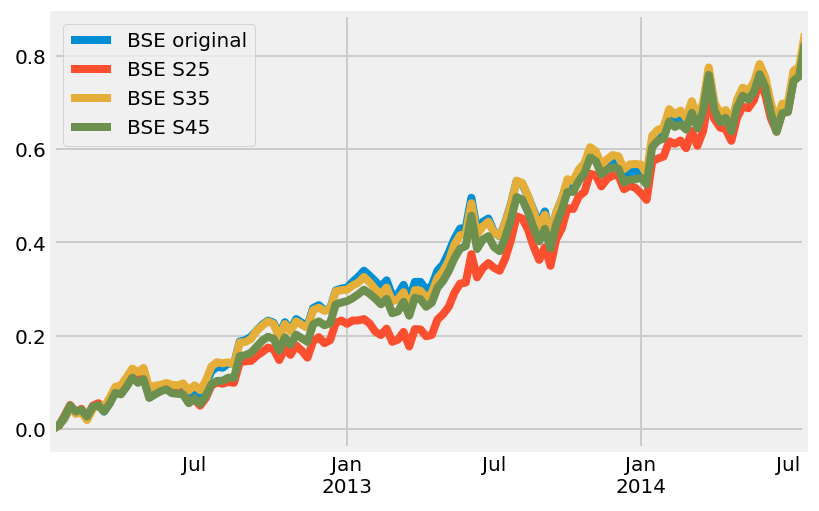

In [536]:
pd.Series(bse_actual, index=pd.date_range(start='01/06/2012', periods=134, freq='W')).plot(label='BSE original', legend=True)

for s in [25,35,45]:
    pd.Series(bse_predict['calibrate'][s], index=pd.date_range(start='01/06/2012', periods = 134,freq='W')).plot(label='BSE S'+str(s), legend=True)
    print("S" +str(s) + " 2-norm difference: ", total_2_norm_diff['calibrate'][s])

In [537]:
for non_communal in port:  
    # some numerical values
    encoding_dim = 10
    s = 10 + non_communal
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:])) # portfolio index
    
    # load our trained models
    deep_learner = load_model('retrack_s' + str(s) + '.h5')
    
    
    x = stock['validate']['return'].iloc[:, stock_index]
    x = dl_scaler[s].transform(x)  
    
    # is it good?
    bse_autoencoded = copy.deepcopy(deep_learner.predict(x))
    bse_autoencoded[0] = 0
    bse_autoencoded = bse_autoencoded/100 + 1
    bse_actual = copy.deepcopy(BSE_percentage[134:])
    bse_actual[0] = 0
    for i in range(1,128):
        bse_actual[i]=(1+(bse_actual[i]/100))*(bse_actual[i-1]+1)-1
    bse_actual = bse_actual.tolist()
    bse_predict['validate'][s] = (bse_actual[0]+1) * (bse_autoencoded.cumprod())-1          
    total_2_norm_diff['validate'][s] = np.linalg.norm((bse_predict['validate'][s] - bse_actual))

C:\Users\Ranju\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\Users\Ranju\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\Users\Ranju\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\Users\Ranju\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\Users\Ranju\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


S25 2-norm difference:  5.204483881006925
S35 2-norm difference:  1.1520578700860276
S45 2-norm difference:  1.6345076165898447


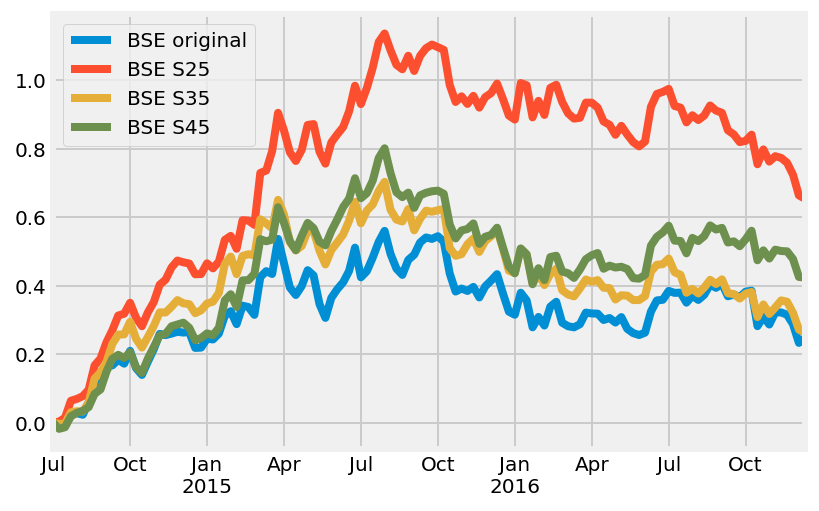

In [538]:
pd.Series(bse_actual, index=pd.date_range(start='07/04/2014', periods=128, freq='W')).plot(label='BSE original', legend=True) 

for s in [25,35,45]:
    pd.Series(bse_predict['validate'][s], index=pd.date_range(start='07/04/2014', periods = 128,freq='W')).plot(label='BSE S'+str(s), legend=True)
    print("S" +str(s) + " 2-norm difference: ", total_2_norm_diff['validate'][s])

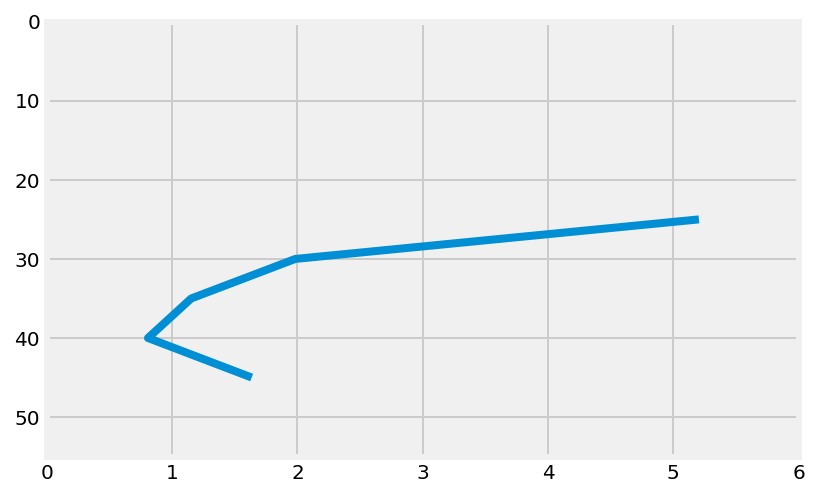

In [541]:
MSE = np.arange(5).astype(np.float32)
k=0

for i in port:
    MSE[k]= total_2_norm_diff['validate'][i+10]
    k=k+1
plt.plot(MSE, port+10)
plt.axis([0, 6, 55, 0])
plt.show()

In [540]:
total_2_norm_diff['validate']

defaultdict(None,
            {25: 5.204483881006925,
             30: 1.9826223166256012,
             35: 1.1520578700860276,
             40: 0.8069615888161409,
             45: 1.6345076165898447})

7